
# 01ZLMA - Exercise 02
Exercise 02 of the course 01ZLMA. 

## Contents

* Fast and furious necessary theory recap from Lectures 01-03
 ---
* Numeric methods of MLE calculations 
 ---
* Newton-Raphson
* Fiher scoring - IWLS
* SGD
* ..



#  Necessary theory recap from Lectures 01-03

Let's consider (m1):
  1. realization $(y_i,\ldots,y_n)$ of $iid$ random variables $Y_1,\ldots,Y_n$ with probability density function $f(y;\theta;\phi)$ from an exponential family of probability distributions
  $$f(y;\theta;\phi) = exp\left(\frac{y \theta - b(\theta)}{a(\phi)} - c(y,\phi)\right),$$
  where conditions of regularity are fulfilled (one dimensional case, i.e. $y_i,\theta_i \in R, a(\phi) >0, \phi >0)$.
  2. Regression matrix $X$ and vector of unknown parameters $\beta$, linear predictor $η = X \beta$
  3. A link function $g(x)$
  $$\eta_i = g(\mu_i) = x_i^T \beta, \ \text{where} \ \mu_i = E[Y_i] \ \ i = 1,\ldots,n$$

The dispersion $a(\phi)$ is typically known. If not, we take it as nuisance parameter.

Link function satisfying $g(\mu_i) = \theta_i$ is called canonical.

Relations:

$$
\beta \xrightarrow[]{\eta_i = x_i^T\beta} \eta
\xrightarrow[]{\mu_i = g^{-1}(\eta_i)}  \mu
\xrightarrow[]{\theta_i = (b')^{-1}(\mu_i)}  \theta
$$ 

Inverse relatiions
$$
\eta_i 
\xleftarrow[]{}  \mu
\xleftarrow[]{}  \theta
$$ 


## Exercise 0

Compute $E[Y]$, $V[Y]$, and $v(Y)$ by the help of moment generating function theory for the following disributions:
*  Normal: $N(\mu,\sigma^2)$
*  Gamma: $\Gamma[a,p]$
* Inverse: Gaussian $IG[\mu, \lambda]$
* Poisson: $Poi(\lambda)$
* Bernoulli: $Ber(p)$

Questions:
* Which distributions can fulfill homoscedasticity?
* For which distribution the variance increases with the square of the mean value?
* Does exists a distribution, where $V[Y] = k \cdot \mu$ ?


## Likelihood, Score function, Information matrix 
(Under conditions M1,M2 and regularity conditions R1-R3 from the lecture)

* Likelihood function:
$$L_n(\Theta) = L_n(\Theta|Y) = \prod_{i=1}^{n} f(y_i|\Theta) $$
* log-likelihood function:
$$l_n(\Theta) = l_n(\Theta|Y) = \sum_{i=1}^{n} \text{ln} f(y_i|\Theta) $$
* Score function:  ($R^m \rightarrow R^m$):
$$U = U(\Theta|Y_i) = \frac{\partial \text{ln} f(y_i|\Theta)}{\partial \Theta} $$
* Score vector (statistics):
$$U_{n} = U_{n}(\Theta|Y) = \sum_{i=1}^{n} U(\Theta|Y_i)= \sum_{i=1}^{n} \frac{\partial l_i(\Theta|y_i)}{\partial \Theta} $$
* Fisher Information matrix
$$ I_n (\Theta) = E_{\theta}[U_nU_n^T]$$
with elements
$$ I_{n,j,k} = E_{\theta}[\frac{\partial l}{\partial \theta_j}\frac{\partial l}{\partial \theta_k}] = -E_{\theta}[\frac{\partial^2 l}{\theta_j \theta_k}]$$


**Questions:**
* Interpret Score on Bernoulli process with N successes and M failures, where the probability of success is $\theta$. What does it mean if Score is greater than zero?
* Why is the second derivative called information (use again $E_{\theta}[U] = 0$)?

Note: The choice of the likelihood function is similar to choice of a prior in Bayesian analysis. (https://stats.stackexchange.com/questions/196576/what-kind-of-information-is-fisher-information?noredirect=1&lq=1)


Add previous question:

Likelihood function of r.v. $X$ with Bernoulli distribution and parameter $p \in (0,1)$:
$$L_n(\Theta) = L_n(\Theta|X) = \prod_{i=1}^{n} f(x_i|\Theta) = \prod_{i=1}^{n} p^{x_i}(1-p)^{1-x_i} \ $$
Log-likelihood function of Bernoulli distribution:
$$l_n(\Theta) = l_n(\Theta|X) = \sum_{i=1}^{n} \text{ln} f(x_i|\Theta) = \sum_{i=1}^{n}  x_i log(p) + (1-x_i)log(1-p) = ylog(p) + (n-y)log(1-p), \ where \ Y = \sum_{i=1}^{n}  X_i$$
Score function of Bernoulli distribution: 
$$U = U(\Theta|x_i) = \frac{\partial \text{ln} f(x_i|\Theta)}{\partial \Theta}  = \frac{1}{p} \sum_{i=1}^{n} x_i - \frac{1}{1-p} (n - \sum_{i=1}^{n}  x_i) = \frac{1}{p} y - \frac{1}{1-p} (n - y)$$
MLE estimation of the parameter $p$:
$$\hat{p}_{MLE} = \frac{y}{n} $$

In [ ]:
import matplotlib.pyplot as plt
from plotnine import *
# https://monashdatafluency.github.io/python-workshop-base/modules/plotting_with_ggplot/
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import bernoulli

[1 0 0 1 0 1 1 0 1 0]
5
0.5
0.0
-6.931471805599453


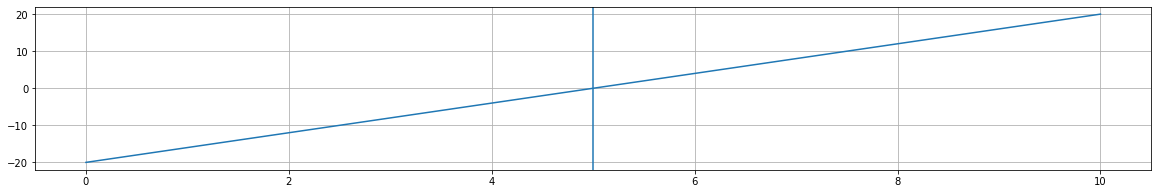

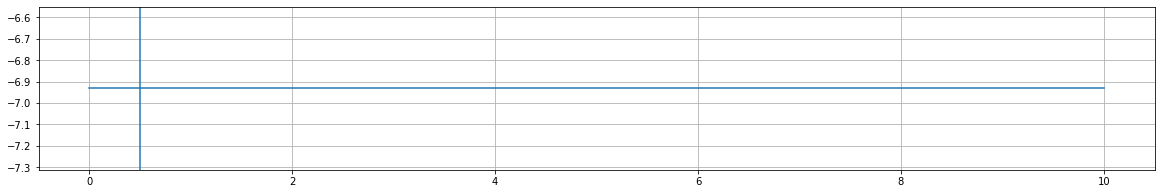

In [ ]:
p = 0.5
n = 10
x = bernoulli.rvs(p, size=n)
print(x)
y = sum(x)
print(y)
p_hat = y/n
print(p_hat)
U = (y/p) - ((n-y)/(1-p))
print(U)
l = (y*np.log(p))+(n-y)*(np.log(1-p))
print(l)
def U(y, n, p):
  U = (y/p) - ((n-y)/(1-p))
  return U
def L(y, n, p):
  L = (y*np.log(p))+(n-y)*(np.log(1-p))
  return L

x = np.linspace(0, 10, 1000)
plt.plot(x, U(x, n, p))
plt.axvline(x=n*p)
plt.grid()
plt.show()

y = np.linspace(0, 10, 1000) # nevychází pro osu y (?)
plt.plot(y, L(y, n, p)) 
plt.axvline(x=p_hat)
plt.grid()
plt.show()

**Exercise 01**

Estimate parameters $\beta$ by MLE for M1.

log-likelihood function is
$$ l(\theta, \phi, y) = \sum_{i=1}^n \frac{y_i \theta_i - b(\theta_i)}{a_i(\phi)} + \sum_{i=1}^n c(y_i,\phi) $$
and we want to estimate $\beta = (\beta_1, \ldots, \beta_n)^T$, i.e.
$$ \hat{\beta} = argmax_{\beta}(l(\theta,\phi,y))$$
$$\Rightarrow$$
$$ U_n = \sum_{i=1}^n \frac{y_i - \mu_i}{V[Y_i]  g'(\mu_i)} x_i = X^T M^{-1}(y-\mu) = 0$$
where $M = diag(V[Y_i]g'(\mu_i))$
$$\Rightarrow$$
$$ U_n(\beta) = X^T W(\beta)^{-1}Z(\beta),$$\
where $W(\beta) = diag(V[Y_i]g'(\mu_i)^2)$ and $Z(\beta) = diag(g'(\mu_i)(y-\mu))$


## Newton Rapson

For MLE using the score function, the estimating equation is
$$\hat{\beta}^{(r+1)} = \hat{\beta}^{(r)} + \frac{U(\hat{\beta}^{(r)})}{\frac{d U(\hat{\beta}^{(r)})}{d \theta}}$$

Question: What are advantages and disadvantages of this method.

## Fisher Scoring

$$\hat{\beta}^{(r+1)} =  \hat{\beta}^{(r)} + \frac{U(\hat{\beta}^{(r)})}{E [\frac{d U(\hat{\beta}^{(r)})}{d \theta} ]} = \hat{\beta}^{(r)} + \frac{U(\hat{\beta}^{(r)})}{I(\hat{\beta}^{(r)})}$$

Question: What are advantages and disadvantages of this method.

# IWLS

$$I(\hat{\beta}^{(r)}) \hat{\beta}^{(r+1)}  =  I(\hat{\beta}^{(r)}) \hat{\beta}^{(r)} + U(\hat{\beta}^{(r)})$$
$$ \Rightarrow$$
$$(X^T W(\hat{\beta}^{(r)})^{-1} X) \hat{\beta}^{(r+1)}  = X^T W(\hat{\beta}^{(r)})^{-1} Z(\hat{\beta}^{(r)})  $$

## Poisson regression example



                               X                               Y
0  [-1, -1, 0, 0, 0, 0, 1, 1, 1]  [2, 3, 6, 7, 8, 9, 10, 12, 15]


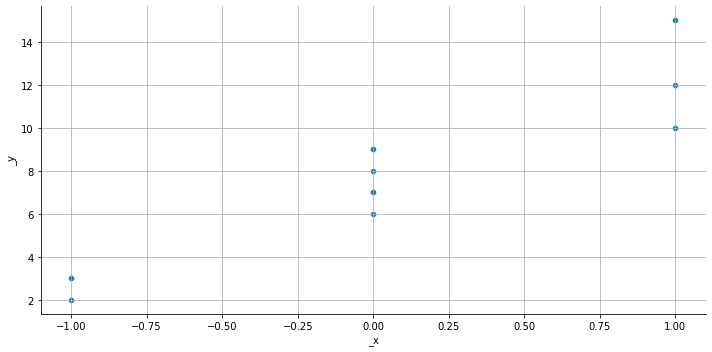

In [ ]:
# Generate and plot the Dataset
X =[-1,-1,0,0,0,0,1,1,1]
Y =[2,3,6,7,8,9,10,12,15]
n = np.size(X)
df = pd.DataFrame({"X": [X], "Y": [Y]})
print(df)

sns.relplot(x=X, y=Y, kind='scatter', aspect=2)
plt.grid()


Let us assume that the response $Y_i$ are Poisson random variables and model the relation ship between $Y_i$ and $x_i$ by the straight line, i.e.
$$E[Y_i] = \mu_i = \beta_1 + \beta_2 x_i = x_i^T \beta \  \Rightarrow \ q(\mu_i) = \mu_i =  x_i^T \beta  = \eta_i$$
Therefore $\frac{1}{g'(\mu_i)} = 1 \ \Rightarrow \ w_{ii} = \frac{1}{V[Y]} = \frac{1}{\beta_1 + \beta_2x_i}$ 

In [ ]:
# Function to calcualate weights
def calc_W(X, beta):
  n, p = X.shape
  h=[]
  for i in range(n):
    h.append(1/np.dot(X[i,:],beta[:,:])) # to n ?
  h = np.reshape(h, -1)
  h.astype(int)
  w = np.diag(h)
  print(w)
  return w

In [ ]:
# Initial values
A = [[1,1,1,1,1,1,1,1,1], [-1,-1,0,0,0,0,1,1,1]]
X = np.transpose(A)
print(X.shape)
beta_0 = np.array([[7],[5]])
print(beta_0.shape)
z = np.array(Y)
print(z)

(9, 2)
(2, 1)
[ 2  3  6  7  8  9 10 12 15]


In [ ]:
# Compute Weight matrix
W = calc_W(X, beta_0)

[[0.5        0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.5        0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.14285714 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.14285714 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.14285714 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.14285714
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.08333333 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.08333333 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.08333333]]


In [ ]:
# Step from beta_0 to beta_1
A = np.linalg.multi_dot([np.transpose(X), W, X])
B = np.linalg.multi_dot([np.transpose(X), W, z])

beta_1 = np.linalg.solve(A,B)
beta_1 = beta_1.reshape((2,1))

In [ ]:
# variance-covariance matrix for estamtes beta_1
W = calc_W(X, beta_1)
C = np.linalg.multi_dot([np.transpose(X), W, X])
n = X.shape[0]
np.linalg.inv(C)

[[0.39779006 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.39779006 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.13420317 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.13420317 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.13420317 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.13420317
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.08071749 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.08071749 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.08071749]]


array([[0.78161657, 0.41683978],
       [0.41683978, 1.18594201]])

# Your turn:
1. Write function to calculate IWLS for example 1 with following parameters
 * maximal number of iteration
 * accuracy
 * initial estimation
2. Try different initialization (ols, random, lecture, ...). Plot convergence of parameters $\beta_i$ depends on initial estimation.


In [ ]:
# Set parameters
maxiter = 10        # maximal number of iteration
epsilon = 10**(-6)   # accuracy
beta_init = np.array([[7],[5]])
beta_all = beta_init

In [ ]:
# https://github.com/aehaynes/IRLS
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv

def IRLS(y, X, maxiter, w_init = 1, d = 0.0001, tolerance = 0.001):
	n,p = X.shape
	delta = array( repeat(d, n) ).reshape(1,n)
	w = repeat(1, n)
	W = diag( w )
	B = dot( inv( X.T.dot(W).dot(X) ), 
			 ( X.T.dot(W).dot(y) ) )
	for _ in range(maxiter):
		_B = B
		_w = abs(y - X.dot(B)).T
		w = float(1)/maximum( delta, _w )
		W = diag( w[0] )
		B = dot( inv( X.T.dot(W).dot(X) ), 
				 ( X.T.dot(W).dot(y) ) )
		tol = sum( abs( B - _B ) ) 
		print("Tolerance = %s" % tol)
		if tol < tolerance:
			return B
	return B


# Example 2

An example 4.1. from the book "An Introduction to Generalized Linear Models" by Dobson. The data in Table 4.5 show the numbers of cases of AIDS in Australia by date of diagnosis for successive 3-months periods from 1984 to 1988.

* Plot the number of cases $y_i$ against time period (i = 1 ... 20).
* Use the Poisson distribution with parameter $\lambda_i = i^{\theta}$ or equivalently $log(\lambda_i) = \theta log(i)$. Plot $log(y_i)$ against $log(i)$ to examne this model.
* Fit a generalized linear model to these data using the Poisson distribution and the log-link function, ie 
$$ g(\lambda_i) = log(\lambda_i) = \beta_1 + \beta_2 x_i,$$
where $x_i = log_i$.

In [ ]:
# dataset from R, aids
from datetime import timedelta
data = {'year':  [1984,1984,1984,1984,1985,1985,1985,1985,1986,1986,1986,1986,1987,1987,1987,1987,1988,1988,1988,1988],
        'quarter': [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4],
         'cases': [1,6,16,23,27,39,31,30,43,51,63,70,88,97,91,104,110,113,149,159],
        'time':['1984-01-01','1984-04-01','1984-07-01','1984-10-01','1985-01-01','1985-04-01','1985-07-01','1985-10-01','1986-01-01','1986-04-01','1986-07-01','1986-10-01','1987-01-01','1987-04-01','1987-07-01','1987-10-01','1988-01-01','1988-04-01','1988-07-01','1988-10-01']}
pd.to_datetime(data['time'])
df = pd.DataFrame(data)

print (df)

    year  quarter  cases        time
0   1984        1      1  1984-01-01
1   1984        2      6  1984-04-01
2   1984        3     16  1984-07-01
3   1984        4     23  1984-10-01
4   1985        1     27  1985-01-01
5   1985        2     39  1985-04-01
6   1985        3     31  1985-07-01
7   1985        4     30  1985-10-01
8   1986        1     43  1986-01-01
9   1986        2     51  1986-04-01
10  1986        3     63  1986-07-01
11  1986        4     70  1986-10-01
12  1987        1     88  1987-01-01
13  1987        2     97  1987-04-01
14  1987        3     91  1987-07-01
15  1987        4    104  1987-10-01
16  1988        1    110  1988-01-01
17  1988        2    113  1988-04-01
18  1988        3    149  1988-07-01
19  1988        4    159  1988-10-01


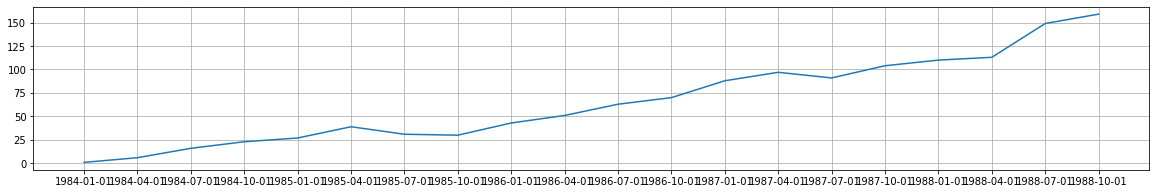

<Figure size 425.197x425.197 with 0 Axes>

In [ ]:
plt.plot(data['time'], data['cases']) 
plt.grid()
def cm_to_inch(value):
    return value/2.54
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(15)))
plt.show()

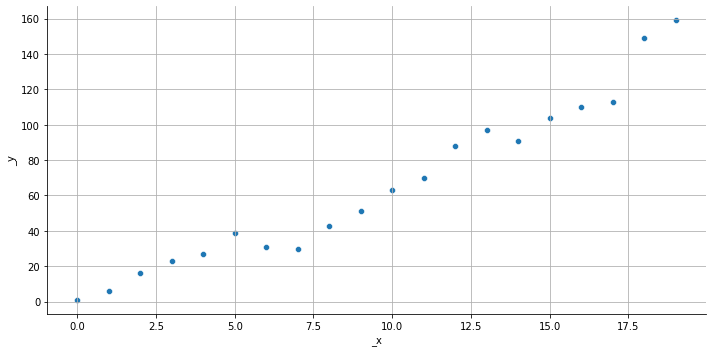

In [ ]:
X = range(0, 20)
Y = data['cases']
sns.relplot(x=X, y=Y, kind='scatter', aspect=2)
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


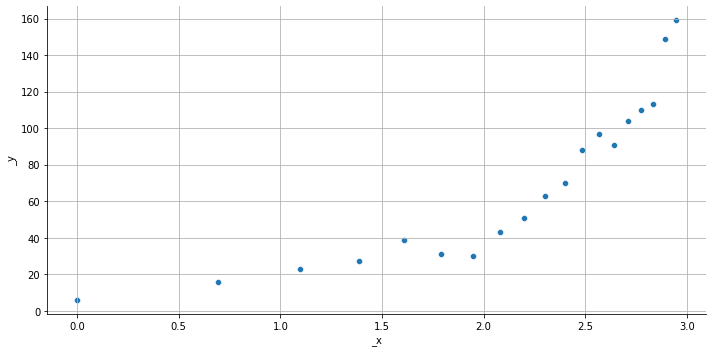

In [ ]:
sns.relplot(x=np.log(X), y=Y, kind='scatter', aspect=2)
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


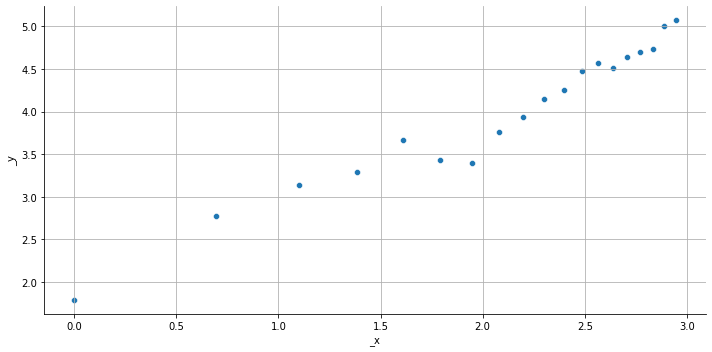

In [ ]:
sns.relplot(x=np.log(X), y=np.log(Y), kind='scatter', aspect=2)
plt.grid()

## Your turn:
Write function to estimate coefficients by IWLS 